In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from datetime import datetime
from torch.utils.data import random_split
import torch.nn.functional as F
from datetime import datetime
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np

torch.set_default_dtype(torch.double)
torch.manual_seed(123)

## 1. Loading data

### 1.1 Loading CIFAR-2


In [5]:
def load_cifar(train_val_split=0.9, data_path='../data/', preprocessor=None):
    
    # Define preprocessor if not already given
    if preprocessor is None:
        preprocessor = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.4915, 0.4823, 0.4468),
                                (0.2470, 0.2435, 0.2616))
        ])
    
    # load datasets
    data_train_val = datasets.CIFAR10(
        data_path,       
        train=True,      
        download=True,
        transform=preprocessor)

    data_test = datasets.CIFAR10(
        data_path, 
        train=False,
        download=True,
        transform=preprocessor)

    # train/validation split
    n_train = int(len(data_train_val)*train_val_split)
    n_val =  len(data_train_val) - n_train

    data_train, data_val = random_split(
        data_train_val, 
        [n_train, n_val],
        generator=torch.Generator().manual_seed(123)
    )

    print("Size of the train dataset:        ", len(data_train))
    print("Size of the validation dataset:   ", len(data_val))
    print("Size of the test dataset:         ", len(data_test))
    
    return (data_train, data_val, data_test)

cifar10_train, cifar10_val, cifar10_test = load_cifar()

# Define cifar 2
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']

# For each dataset, keep only airplanes and birds
cifar2_train = [(img, label_map[label]) for img, label in cifar10_train if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]
cifar2_test = [(img, label_map[label]) for img, label in cifar10_test if label in [0, 2]]

print('Size of the training dataset: ', len(cifar2_train))
print('Size of the validation dataset: ', len(cifar2_val))
print('Size of the test dataset: ', len(cifar2_test))

Files already downloaded and verified
Files already downloaded and verified
Size of the train dataset:         45000
Size of the validation dataset:    5000
Size of the test dataset:          10000
Size of the training dataset:  9017
Size of the validation dataset:  983
Size of the test dataset:  2000


### 1.2 Analyze Cifar-10

In [6]:

i = 100
i_elt = cifar10_train[i]

# Type of the ith element of the training dataset: 
print("Type of the ith element in the dataset  :  ", type(i_elt))
print("Tuple length of this element            :  ", len(i_elt))
print("Type of the 1st element of the tuple    :  ", type(i_elt[0]))
print("Type of the 2nd element of the tuple    :  ", type(i_elt[1]))


print("")
img, label = cifar10_train[i]

Type of the ith element in the dataset  :   <class 'tuple'>
Tuple length of this element            :   2
Type of the 1st element of the tuple    :   <class 'torch.Tensor'>
Type of the 2nd element of the tuple    :   <class 'int'>



In [7]:
# counter: counts the occurrences of each unique label in the list.
Counter([label for _, label in cifar10_train])

Counter({9: 4520,
         6: 4517,
         0: 4513,
         4: 4510,
         8: 4506,
         7: 4505,
         3: 4504,
         2: 4504,
         1: 4471,
         5: 4450})

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Type of the ith element in the dataset  :   <class 'tuple'>
Tuple length of this element            :   2
Type of the 1st element of the tuple    :   <class 'torch.Tensor'>
Type of the 2nd element of the tuple    :   <class 'int'>

using print(img):  tensor([[[ 1.5189,  1.2014,  0.0106,  ..., -0.7832, -0.6880, -0.8150],
         [ 0.3440,  0.3916,  0.4075,  ..., -0.5133, -0.6404, -0.4816],
         [-0.6086, -0.0847,  0.2329,  ..., -0.6245, -0.8944, -0.5927],
         ...,
         [ 0.6298,  0.8679,  1.4871,  ..., -1.1484, -0.4181,  0.5345],
         [ 0.3599,  0.5822,  1.5030,  ..., -1.1802, -0.5610,  0.4869],
         [-0.0370,  0.0265,  1.3760,  ..., -1.1960, -0.4498,  0.4393]],

        [[ 1.8523,  1.5141,  0.2901,  ..., -0.4024, -0.1769, -0.2091],
         [ 0.6444,  0.6927,  0.6766,  ..., -0.1447, -0.2091,  0.0485],
         [-0.2736,  0.2579,  0.5800,  ..., -0.1769, -0.3702,  0.0163],
         ...,
         [ 0.2257,  0.4995,  1.2242,  ..., -1.0144, -0.1447,  0.9343],
         

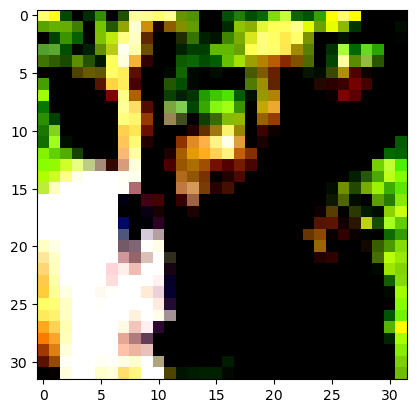

In [8]:

i = 100
i_elt = cifar10_train[i]

# Type of the ith element of the training dataset: 
print("Type of the ith element in the dataset  :  ", type(i_elt))
print("Tuple length of this element            :  ", len(i_elt))
print("Type of the 1st element of the tuple    :  ", type(i_elt[0]))
print("Type of the 2nd element of the tuple    :  ", type(i_elt[1]))


print("")
img, label = cifar10_train[i]


print("using print(img): ", img)  
plt.imshow(img.permute(1, 2, 0))  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

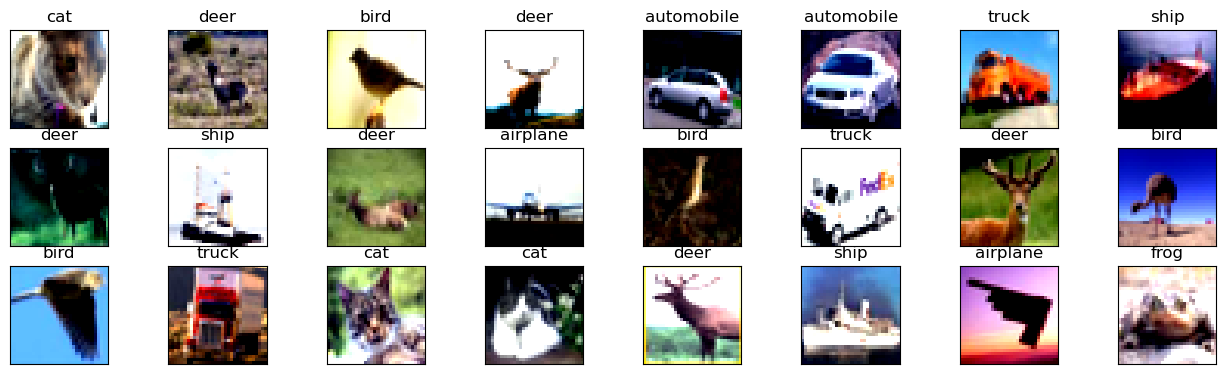

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
               
# Create a new figure
plt.figure(figsize=(16,12))

# Loop over the first 24 images
for i in range(24):
    img, label = cifar10_train[i]
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Normalize the pixel values to be between 0 and 1 if they aren't already
    img = img / 2 + 0.5     # Undo normalization
    npimg = img.numpy()     # Convert from tensor to numpy array
    plt.imshow(npimg.transpose((1, 2, 0)))  # Correct the dimension order for display

    # Set the label as the title
    plt.title(class_names[label], fontsize=12)  # Assuming 'label' is an index. Adjust if it's not.

# Display the figure
plt.show()

## 2. Define a neural network

In [10]:
# MLP class for 3.1.2

# CRITERIA:
#   * The input dimension is 3072 (= 32*32*3) and the output dimension is 2 (for the 2 classes).
#   * The hidden layers have respectively 512, 128 and 32 hidden units.
#   * All activation functions are ReLU. The last layer has no activation function since the cross-entropy loss already includes a softmax activation function.

# Layout: [3072, 512, 128, 32, 2]

class MLP(nn.Module):
    
    #Architecture:
    def __init__(self):
        super().__init__()
        # No need to declare activation functions nor maxpool layers anymore.
        #The model consists of three fully connected (linear) layers.
        #The first layer has 32x32x3 input features (flattened image size) and 512 output features.
        #The second layer has 512 input features and 128 output features.
        #The third layer has 128 input features and 32 output features.
        #The fourth layer has 32 input features and 2 output features.
        # The Linear function applies the necessary linear transformation and we pass on these values into the the activation function for the layer.
        # nn.Sequential and nn.Linear automates this whole process and allows us to simply define how many in and out features are at each step-
        # and which activation function it should be passed onto.
        # This makes our forward pass quite compact.
        self.model = nn.Sequential(
            nn.Linear(in_features=3072, out_features=512),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=32),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=2))
    
    #Forward Pass:  
    def forward(self, x):
        # Activation functions now come from the functional API 
        out = torch.flatten(x, 1)  # the input tensor x is flattened.
        # Since we defined the structure of our MLP using nn.Sequential we can easily just pass on our input values to our model,
        # it passes through the fully connected layers with activation functions, and the final output is produced by the last fully connected layer. 
        return self.model(out)
    #In the forward method, the input tensor (x) is flattened using torch.flatten.
    #The flattened tensor is passed through the fully connected layers with the activation function nn.ReLU.
    #The final output is produced by the last fully connected layer.





In [11]:

model = MLP()


# A list containing the number of parameters for each layer in the model:
numel_list = [p.numel() for p in model.parameters()]

#print the total number of parameters in the model:
print("Total number of parameters: ", sum(numel_list))
print("Number of parameter per layer: ", numel_list)

img, _ = cifar2_train[0]

output_tensor = model(img.unsqueeze(0))
print("Output: \n", output_tensor)

Total number of parameters:  1643234
Number of parameter per layer:  [1572864, 512, 65536, 128, 4096, 32, 64, 2]
Output: 
 tensor([[ 0.1091, -0.2124]], grad_fn=<AddmmBackward0>)


## 3.Training loop
### Task 3.3 Train automatic update

In [12]:
def train(n_epochs, optimizer, model, loss_fn, train_loader):
    
    n_batch = len(train_loader)
    losses_train = []
    model.train()
    optimizer.zero_grad(set_to_none=True)
    
    for epoch in range(1, n_epochs + 1):
        
        loss_train = 0.0
        for imgs, labels in train_loader:

            imgs = imgs.to(device=device) 
            labels = labels.to(device=device)

            outputs = model(imgs)
            
            loss = loss_fn(outputs, labels)
            loss.backward()
            
            optimizer.step()
            optimizer.zero_grad()

            loss_train += loss.item()
            
        losses_train.append(loss_train / n_batch)

        if epoch == 1 or epoch % 5 == 0:
            print('{}  |  Epoch {}  |  Training loss {:.3f}'.format(
                datetime.now().time(), epoch, loss_train / n_batch))
    return losses_train

In [13]:
device = (torch.device('cuda') if torch.cuda.is_available()
          else torch.device('cpu'))
print(f"Training on device {device}.")

#DataLoader is created for the training set (cifar2_train). It loads the data in batches of size 64.
train_loader = torch.utils.data.DataLoader(cifar2_train, batch_size=64, shuffle=False)

#An instance of the MLP model is created, and is moved to the specified device using the .to(device) method.
torch.manual_seed(1313)
model = MLP().to(device=device) 
optimizer = optim.SGD(model.parameters(), lr=1e-2) #optimizer
loss_fn = nn.CrossEntropyLoss() #loss function




#perform the training:
train(
    n_epochs = 20,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

Training on device cpu.
21:05:42.600581  |  Epoch 1  |  Training loss 0.637
21:05:49.982887  |  Epoch 5  |  Training loss 0.419
21:05:58.721648  |  Epoch 10  |  Training loss 0.325
21:06:07.731600  |  Epoch 15  |  Training loss 0.245
21:06:16.364845  |  Epoch 20  |  Training loss 0.182


[0.636642628797256,
 0.5356402170104977,
 0.4783564416058405,
 0.4454844253755625,
 0.4192846169010078,
 0.3970154256193156,
 0.37747958116372404,
 0.3592973445571799,
 0.341709056463558,
 0.3245003818498842,
 0.30740053723383387,
 0.2908448373629415,
 0.2750605416266851,
 0.2598751980368685,
 0.2452404936839396,
 0.2311262514604676,
 0.21751563516653713,
 0.2040536058859307,
 0.1930562493916822,
 0.18239039733598522]

### Task 3.4 Train manual update

In [14]:
def train_manual_update(n_epochs, model, loss_fn, train_loader, lr):
    n_batch = len(train_loader)
    losses_train = []
    model.train()

    for epoch in range(1, n_epochs + 1):
        
        loss_train = 0.0
        for imgs, labels in train_loader:
            
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)

            outputs = model(imgs)
            
            loss = loss_fn(outputs, labels)
            loss.backward()  # Compute gradient
            
            # Manual update of parameters
            with torch.no_grad():  # Temporarily set all the requires_grad flags to false
                for param in model.parameters():
                    param -= lr * param.grad
            
            # Zero out all gradients
            model.zero_grad()  # This replaces optimizer.zero_grad()

            loss_train += loss.item()
        
        losses_train.append(loss_train / n_batch)

        if epoch == 1 or epoch % 5 == 0:
            print('{}  |  Epoch {}  |  Training loss {:.3f}'.format(
                datetime.now().time(), epoch, loss_train / n_batch))
    return losses_train


In [15]:

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Training on device {device}.")

# DataLoader creation for the training set
train_loader = torch.utils.data.DataLoader(cifar2_train, batch_size=64, shuffle=False)

# Model instance creation
torch.manual_seed(1313)
model = MLP().to(device=device)  # Assuming MLP is your model class

# Loss function
loss_fn = nn.CrossEntropyLoss()

# Define the learning rate for manual update
lr = 1e-2  # Learning rate

# Perform the training without an optimizer, using manual update
train_manual_update(
    n_epochs=20,  # Number of epochs
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
    lr=lr  # Learning rate for manual updates
)


Training on device cpu.
21:07:04.748328  |  Epoch 1  |  Training loss 0.637
21:07:14.628020  |  Epoch 5  |  Training loss 0.419


KeyboardInterrupt: 

### Task 3.6 train manual with a L2 regularization 

In [ ]:
def train_manual_update_decay(n_epochs, model, loss_fn, train_loader, lr, weight_decay):
    n_batch = len(train_loader)
    losses_train = []
    model.train()

    for epoch in range(1, n_epochs + 1):
        
        loss_train = 0.0
        for imgs, labels in train_loader:
            
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)

            outputs = model(imgs)
            
            loss = loss_fn(outputs, labels)
            loss.backward()  # Compute gradient
            
            # Manual update of parameters with L2 regularization
            with torch.no_grad():  # Temporarily set all the requires_grad flags to false
                for param in model.parameters():
                    if param.requires_grad:  # Only update parameters that require gradients
                        param -= lr * (param.grad + weight_decay * param)
            
            # Zero out all gradients
            model.zero_grad()  # This replaces optimizer.zero_grad()

            loss_train += loss.item()
        
        losses_train.append(loss_train / n_batch)

        if epoch == 1 or epoch % 5 == 0:
            print('{}  |  Epoch {}  |  Training loss {:.3f}'.format(
                datetime.now().time(), epoch, loss_train / n_batch))
    return losses_train


In [ ]:
# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Training on device {device}.")

# DataLoader creation for the training set
train_loader = torch.utils.data.DataLoader(cifar2_train, batch_size=64, shuffle=True)
loss_fn = nn.CrossEntropyLoss() #loss function

model = MLP().to(device=device)
weight_decay = 0.01  # Example weight decay value
train_manual_update_decay(
    n_epochs=20,  # Number of epochs
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
    lr=lr,  # Learning rate for manual updates
    weight_decay=weight_decay  # Adding weight decay
)


Training on device cpu.
18:17:33.185544  |  Epoch 1  |  Training loss 0.617
18:17:46.563219  |  Epoch 5  |  Training loss 0.415
18:18:01.970516  |  Epoch 10  |  Training loss 0.330
18:18:17.520770  |  Epoch 15  |  Training loss 0.272
18:18:33.192718  |  Epoch 20  |  Training loss 0.214


[0.6170548025186698,
 0.516937634857834,
 0.46888790764854815,
 0.4396217718294048,
 0.41488417828293833,
 0.3943711698445312,
 0.37571317043021646,
 0.3584340287345436,
 0.34168421903719015,
 0.32989931916591686,
 0.31667395259659503,
 0.30504713094200875,
 0.29187586531665266,
 0.27943769645150585,
 0.2715458087572229,
 0.26368377757915534,
 0.2474668903831448,
 0.23392321768475113,
 0.23508663437756824,
 0.21396984412153347]

### Task 3.7 train manual with a L2 regularization momentum

In [16]:
def train_manual_update_momentum(n_epochs, model, loss_fn, train_loader, lr, weight_decay, momentum):
    n_batch = len(train_loader)
    losses_train = []
    model.train()
    # Initialize the velocity for each parameter
    velocities = {param: torch.zeros_like(param) for param in model.parameters()}

    for epoch in range(1, n_epochs + 1):
        
        loss_train = 0.0
        for imgs, labels in train_loader:
            
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)

            outputs = model(imgs)
            
            loss = loss_fn(outputs, labels)
            loss.backward()  # Compute gradient
            
            # Manual update of parameters with L2 regularization and momentum
            with torch.no_grad():  # Temporarily set all the requires_grad flags to false
                for param, velocity in zip(model.parameters(), velocities.values()):
                    if param.requires_grad:  # Only update parameters that require gradients
                        # Apply L2 regularization directly in the update
                        grad = param.grad + weight_decay * param
                        # Update velocity
                        velocity.mul_(momentum).add_(grad, alpha=lr)
                        # Update parameter
                        param.sub_(velocity)
                        
            
            # Zero out all gradients
            model.zero_grad()  # This replaces optimizer.zero_grad()

            loss_train += loss.item()
        
        losses_train.append(loss_train / n_batch)

        if epoch == 1 or epoch % 5 == 0:
            print('{}  |  Epoch {}  |  Training loss {:.3f}'.format(
                datetime.now().time(), epoch, loss_train / n_batch))
            
    return losses_train


In [42]:
# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Training on device {device}.")

# DataLoader creation for the training set
train_loader = torch.utils.data.DataLoader(cifar2_train, batch_size=64, shuffle=True)
loss_fn = nn.CrossEntropyLoss() #loss function

model = MLP().to(device=device)
train_manual_update_momentum(
    n_epochs=20,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
    lr=1e-2,
    weight_decay=0.01,  # Example weight decay value
    momentum=0.9  # Same momentum value for comparison
)


Training on device cpu.
18:18:36.948293  |  Epoch 1  |  Training loss 0.519
18:18:50.719437  |  Epoch 5  |  Training loss 0.336
18:19:08.065978  |  Epoch 10  |  Training loss 0.276
18:19:25.304656  |  Epoch 15  |  Training loss 0.255
18:19:43.540908  |  Epoch 20  |  Training loss 0.236


[0.5194311673538885,
 0.4113917309571796,
 0.3819458147400226,
 0.352377093197,
 0.3358025185370289,
 0.3292243299354232,
 0.2993548778569088,
 0.30434895364229975,
 0.299944791911911,
 0.2762693025181062,
 0.26130130855397676,
 0.28147522080133425,
 0.2640005899436142,
 0.2567909722847861,
 0.25508789800165615,
 0.25323850875090004,
 0.2420961811033107,
 0.23335285402676065,
 0.23450782637560794,
 0.23573211050189172]

In [17]:
def compute_accuracy(model, loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)

            outputs = model(imgs)
            _, predicted = torch.max(outputs, dim=1)
            total += labels.shape[0]
            correct += int((predicted == labels).sum())

    acc =  correct / total
    print("Accuracy: {:.2f}".format(acc))
    return acc

In [18]:


train_loader = torch.utils.data.DataLoader(cifar2_train, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

print("Training accuracy:")
compute_accuracy(model, train_loader)
print("Validation accuracy:")
compute_accuracy(model, val_loader)

Training accuracy:
Accuracy: 0.86
Validation accuracy:
Accuracy: 0.83


0.8331637843336724

## Task 3.8 Train different instances of the MyMLP model

Training on device cpu.
#####
Now training with parameters: lr=0.005, momentum=0.9, decay=0.001
21:51:43.439457  |  Epoch 1  |  Training loss 0.664 | Validation loss 0.633
21:51:56.938697  |  Epoch 5  |  Training loss 0.494 | Validation loss 0.485
21:52:13.357093  |  Epoch 10  |  Training loss 0.408 | Validation loss 0.412
21:52:29.807486  |  Epoch 15  |  Training loss 0.349 | Validation loss 0.386
21:52:46.302496  |  Epoch 20  |  Training loss 0.293 | Validation loss 0.399
Training accuracy:
Accuracy: 0.88
Validation accuracy:
Accuracy: 0.82
#####
Now training with parameters: lr=0.02, momentum=0.8, decay=0.005
21:52:50.312074  |  Epoch 1  |  Training loss 0.575 | Validation loss 0.496
21:53:03.557898  |  Epoch 5  |  Training loss 0.369 | Validation loss 0.425
21:53:19.936877  |  Epoch 10  |  Training loss 0.284 | Validation loss 0.378
21:53:36.416881  |  Epoch 15  |  Training loss 0.219 | Validation loss 0.390
21:53:52.891143  |  Epoch 20  |  Training loss 0.175 | Validation loss 0.3

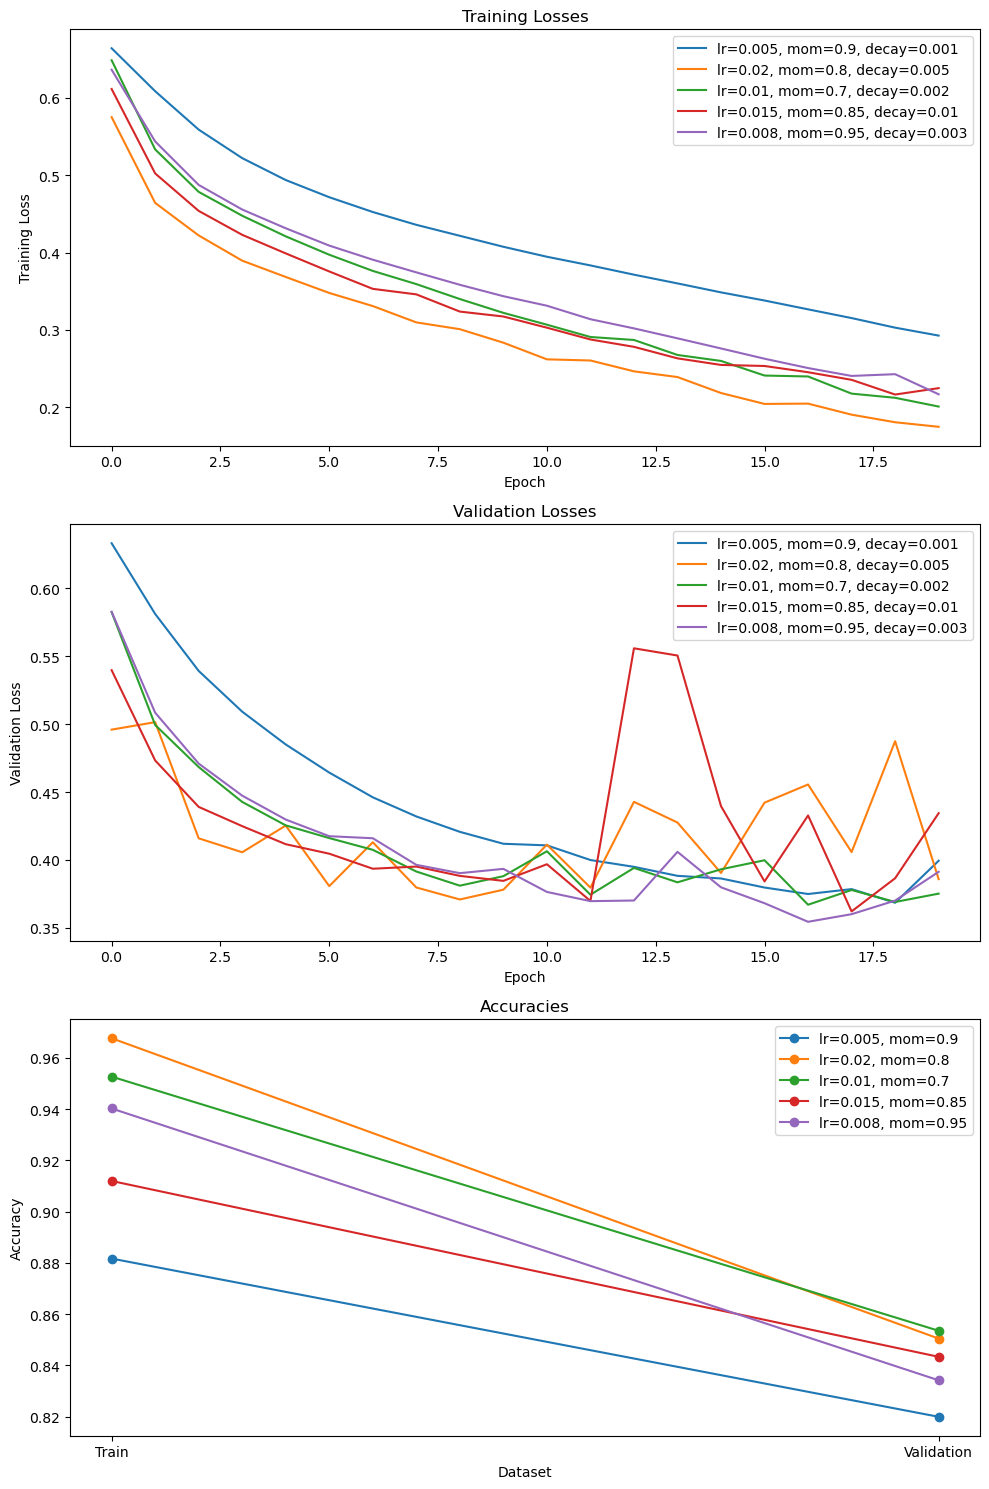

In [26]:


# Set up parameters for training
parameters = [
    {'lr': 0.005, 'momentum': 0.9, 'decay': 0.001},
    {'lr': 0.02, 'momentum': 0.8, 'decay': 0.005},
    {'lr': 0.01, 'momentum': 0.7, 'decay': 0.002},
    {'lr': 0.015, 'momentum': 0.85, 'decay': 0.01},
    {'lr': 0.008, 'momentum': 0.95, 'decay': 0.003}
]

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Training on device {device}.")

# Training and validation data loaders

train_loader = torch.utils.data.DataLoader(cifar2_train, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)


# Training function modified to include validation loss calculation
def train_manual_update_decay_with_val(n_epochs, model, loss_fn, train_loader, val_loader, lr, weight_decay):
    n_batch = len(train_loader)
    losses_train = []
    losses_val = []  # List to store validation losses
    model.train()

    for epoch in range(1, n_epochs + 1):
        
        loss_train = 0.0
        for imgs, labels in train_loader:
            
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)

            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            loss.backward()  # Compute gradient
            
            # Manual update of parameters with L2 regularization
            with torch.no_grad():
                for param in model.parameters():
                    if param.requires_grad:
                        param -= lr * (param.grad + weight_decay * param)
            
            model.zero_grad()
            loss_train += loss.item()

        # Validation phase
        loss_val = 0.0
        model.eval()
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                loss = loss_fn(outputs, labels)
                loss_val += loss.item()

        # Store average losses
        losses_train.append(loss_train / n_batch)
        losses_val.append(loss_val / len(val_loader))

        if epoch == 1 or epoch % 5 == 0:
            print('{}  |  Epoch {}  |  Training loss {:.3f} | Validation loss {:.3f}'.format(
                datetime.now().time(), epoch, loss_train / n_batch, loss_val / len(val_loader)))

    return losses_train, losses_val

# Store results
results = []

# Loop over each set of parameters
for param in parameters:
    print("#####")
    print(f"Now training with parameters: lr={param['lr']}, momentum={param['momentum']}, decay={param['decay']}")
    model = MLP().to(device)  
    loss_fn = nn.CrossEntropyLoss()

    train_history, val_history = train_manual_update_decay_with_val(
        n_epochs=20,
        model=model,
        loss_fn=loss_fn,
        train_loader=train_loader,
        val_loader=val_loader,
        lr=param['lr'],
        weight_decay=param['decay']
    )

    print("Training accuracy:")
    train_acc = compute_accuracy(model, train_loader)
    print("Validation accuracy:")
    val_acc = compute_accuracy(model, val_loader)
    
    results.append({
        'params': param,
        'train_acc': train_acc,
        'val_acc': val_acc,
        'train_losses': train_history,
        'val_losses': val_history
    })

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 15))  # Adjusted for three subplots
for result in results:
    ax[0].plot(result['train_losses'], label=f"lr={result['params']['lr']}, mom={result['params']['momentum']}, decay={result['params']['decay']}")
    ax[1].plot(result['val_losses'], label=f"lr={result['params']['lr']}, mom={result['params']['momentum']}, decay={result['params']['decay']}")
    ax[2].plot([result['train_acc'], result['val_acc']], marker='o', linestyle='-', label=f"lr={result['params']['lr']}, mom={result['params']['momentum']}")

ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Training Loss')
ax[0].legend()
ax[0].set_title('Training Losses')

ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Validation Loss')
ax[1].legend()
ax[1].set_title('Validation Losses')

ax[2].set_xlabel('Dataset')
ax[2].set_ylabel('Accuracy')
ax[2].set_xticks([0, 1])
ax[2].set_xticklabels(['Train', 'Validation'])
ax[2].legend()
ax[2].set_title('Accuracies')

plt.tight_layout()
plt.show()


### Task 3.9-10 Testing and evaluating the best instance

In [27]:
# Set up the device
#{'lr': 0.01, 'momentum': 0.7, 'decay': 0.002},
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Training on device {device}.")

# DataLoader creation for the training set
train_loader = torch.utils.data.DataLoader(cifar2_train, batch_size=64, shuffle=True)
loss_fn = nn.CrossEntropyLoss() #loss function

model = MLP().to(device=device)
train_manual_update_momentum(
    n_epochs=20,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
    lr=0.01,
    weight_decay=0.002,
    momentum=0.7  
)


Training on device cpu.
22:04:45.416173  |  Epoch 1  |  Training loss 0.558
22:05:00.230144  |  Epoch 5  |  Training loss 0.328
22:05:17.806731  |  Epoch 10  |  Training loss 0.213
22:05:35.374276  |  Epoch 15  |  Training loss 0.135
22:05:54.032980  |  Epoch 20  |  Training loss 0.112


[0.5578239940313824,
 0.43942365622708623,
 0.3930412053723113,
 0.36031470963225065,
 0.3281824528754923,
 0.30187576491238655,
 0.278508810598063,
 0.2564417933649549,
 0.24100596280648728,
 0.21273494670806442,
 0.1994558724122422,
 0.18413988878024673,
 0.16923206135273905,
 0.17718912283521293,
 0.1354673789272211,
 0.12463991324783069,
 0.12184028071876978,
 0.1096652396401772,
 0.1084713927587243,
 0.11160102645885293]

In [28]:

val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

print("Training accuracy:")
compute_accuracy(model, train_loader)
print("Validation accuracy:")
compute_accuracy(model, val_loader)

Training accuracy:
Accuracy: 0.98
Validation accuracy:
Accuracy: 0.85


0.8504577822990844

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
import torch

def modified_compute_accuracy(model, loader, device='cpu'):
    model.eval()
    correct = 0
    total = 0
    num_classes = 2  
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)

            outputs = model(imgs)
            _, predicted = torch.max(outputs, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Update the confusion matrix
            for t, p in zip(labels.view(-1), predicted.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

    acc = correct / total
    print("Accuracy: {:.2f}%".format(100 * acc))

    # Plotting the confusion matrix
    plt.figure(figsize=(10,10))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes), rotation=45)
    plt.yticks(tick_marks, range(num_classes))

    thresh = confusion_matrix.max() / 2.
    for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    return acc


Test accuracy:
Accuracy: 84.80%


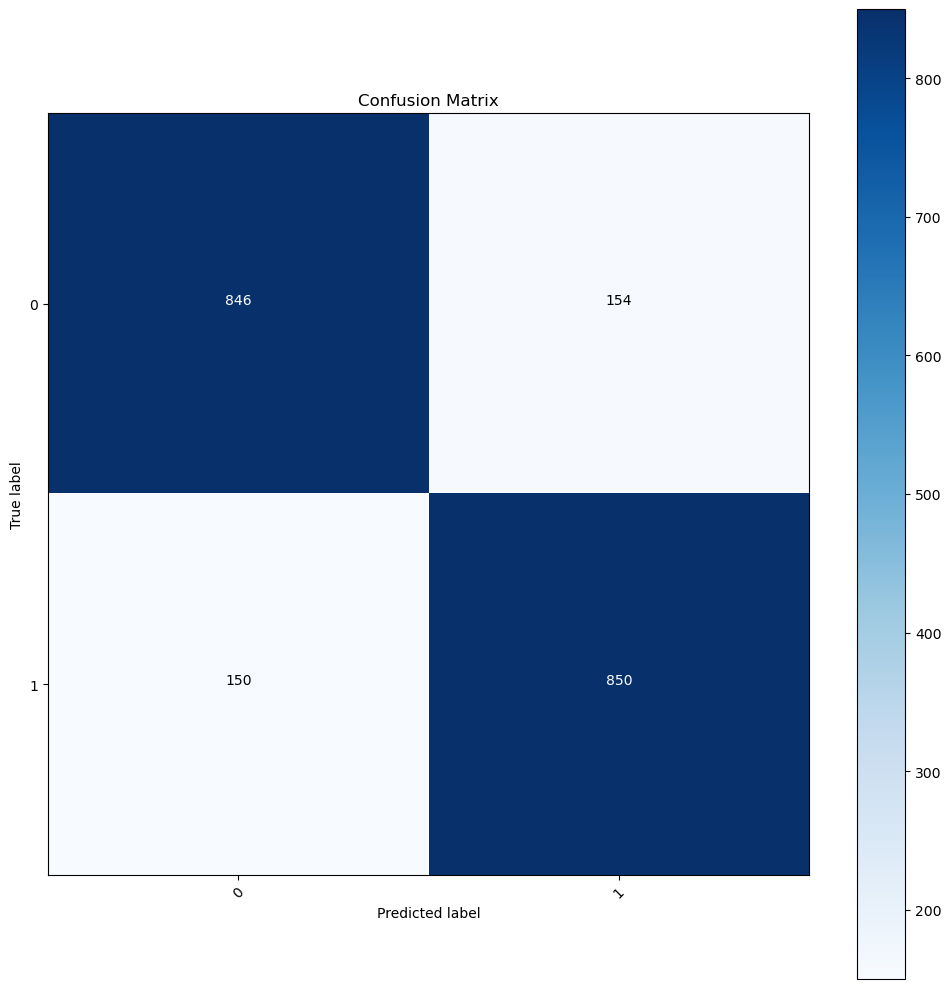

0.848

In [31]:
test_loader = torch.utils.data.DataLoader(cifar2_test, batch_size=64, shuffle=False)
print("Test accuracy:")
modified_compute_accuracy(model, test_loader)

#### 5.1 Plot examples of misclassified input

In [32]:
import numpy as np
import torch

def collect_misclassified(model, loader, device):
    model.eval()
    misclassified = []  # Store misclassified images and labels

    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            labels = labels.to(device)
            outputs = model(imgs)
            _, predicted = torch.max(outputs, dim=1)
            mask = predicted != labels

            for img, true_label, pred_label in zip(imgs[mask], labels[mask], predicted[mask]):
                misclassified.append((img.cpu(), true_label.cpu(), pred_label.cpu()))

    return misclassified


In [33]:
import matplotlib.pyplot as plt

def plot_misclassified(misclassified, class_names):
    # Plot a number of misclassified examples
    num_examples = min(len(misclassified), 20)  # Displays 20 images
    plt.figure(figsize=(16, 16))
    for i, (img, true_label, pred_label) in enumerate(misclassified[:num_examples]):
        plt.subplot(2, num_examples // 2, i + 1)
        plt.imshow(img.permute(1, 2, 0).numpy())  
        plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

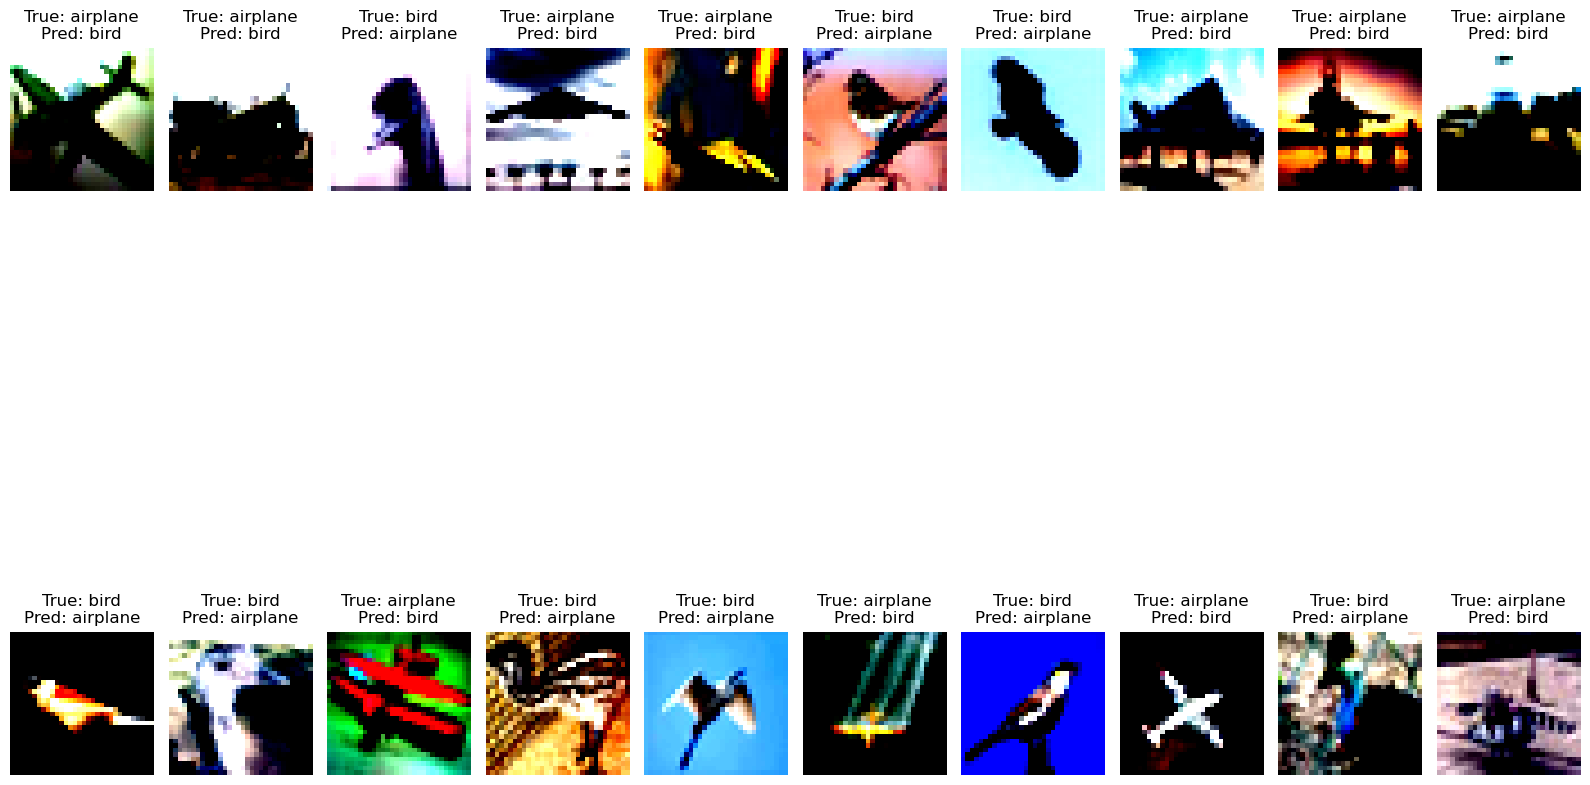

In [34]:
class_names = ['airplane', 'bird']  # Replace these with your CIFAR-2 classes

# Collect misclassified images
misclassified = collect_misclassified(model, test_loader, device)

# Plot the misclassified images
plot_misclassified(misclassified, class_names)
